# Aim of the notebook
This notebook is made for the Capstone Project of the Data Science Intensive Course at Springboard. 

## Capstone Project

The aim of the Capstone Project is a Kaggle Competition: https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring<br>
The data contains images of fishes made on a fisher boat.<br> 
Goal of this competition is to predict the race of the fish for a given image.


### Approach
<ol type="1">
    <li>Analyze the dataset</li>
    <li>Choose a proper model based on the analysis</li>
    <li>Train the model</li>
    <li>Improve model</li>
    <li>Submit to <u>Kaggle</u></li>
</ol>


### 1. Analyze the dataset
<ul>
    <li>Check how the images look.</li>
    <li>Check how many training examples are aviable for each class.</li>
    <li>Check the size of the images</li>
<ul>

The data set contains 8 different classes.<br>

<ul>
    <li>ALB - Albacore tuna</li>
    <li>BET - Bigeye tuna</li>
    <li>DOL - Dolphinfish</li>
    <li>LAG - Opah, Moonfish</li>
    <li>SHARK - Various: Silky, Shortfin Mako</li>
    <li>YFT - Yellowfin tuna</li>
    <li>NoF - No fish</li>
    <li>OTHER - Other fishes</li>
<ul>

In [1]:
!pip install opencv-python


In [2]:
# import libraries
%matplotlib inline

import os as os
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image

#### Check how the images look

For this point I did go through the images directly in the folder, because it's much quicker than loading every image into the notebook. But I will show some an example for each class in the notebook.

<u>ALB - Albacore tuna</u>

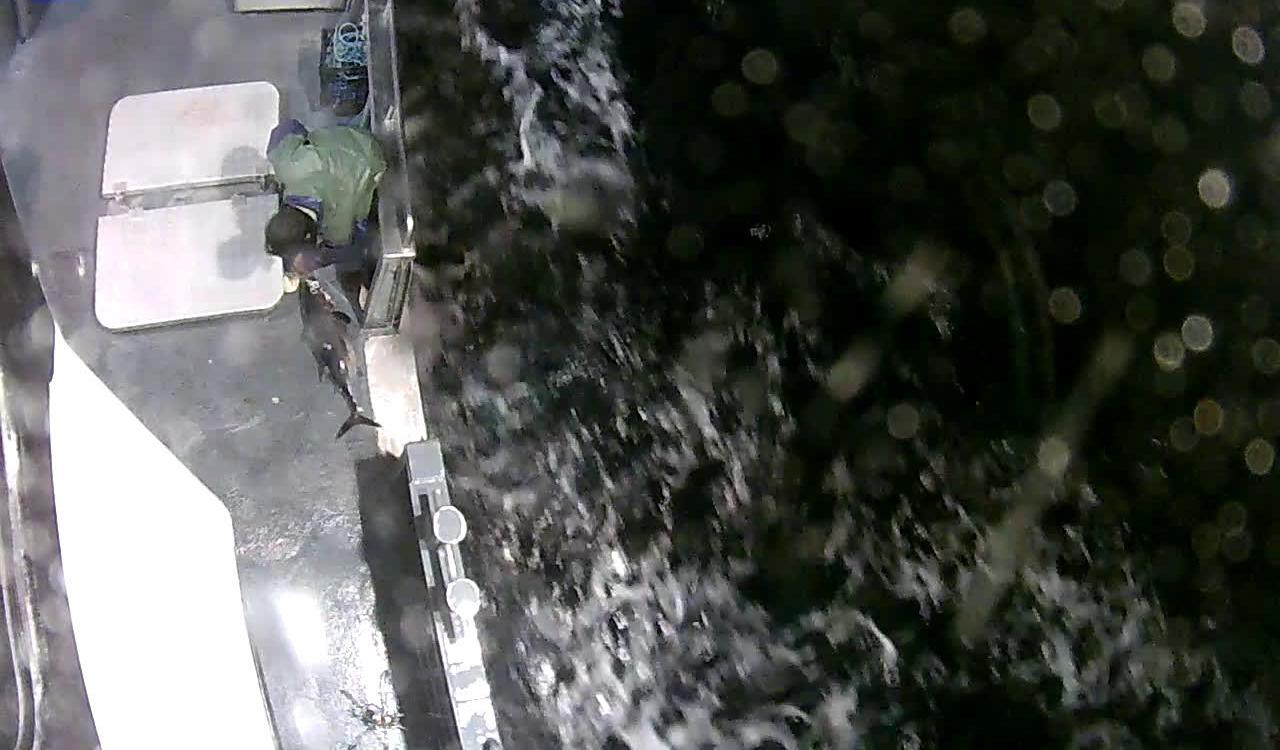

In [3]:
Image(data="data/train/train/ALB/img_00037.jpg")

<u>BET - Bigeye tuna</u>

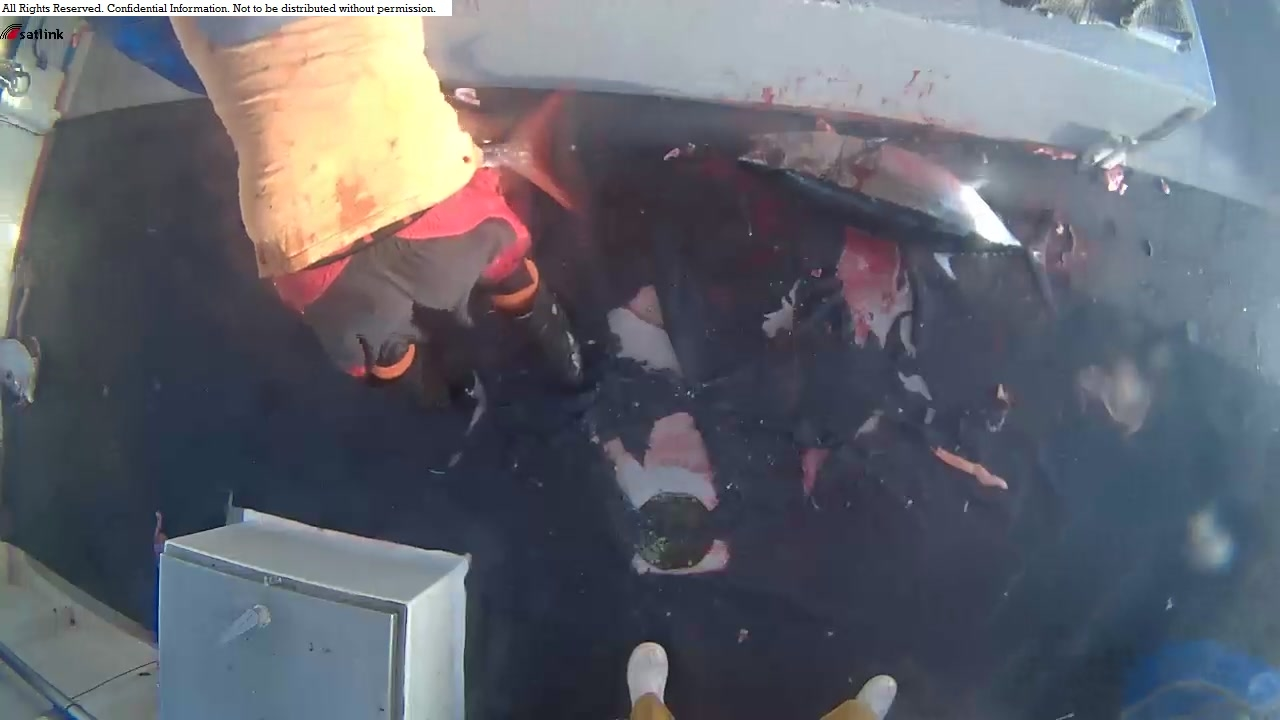

In [4]:
Image(data="data/train/train/BET/img_00491.jpg")

<u>DOL - Dolphinfish</u>

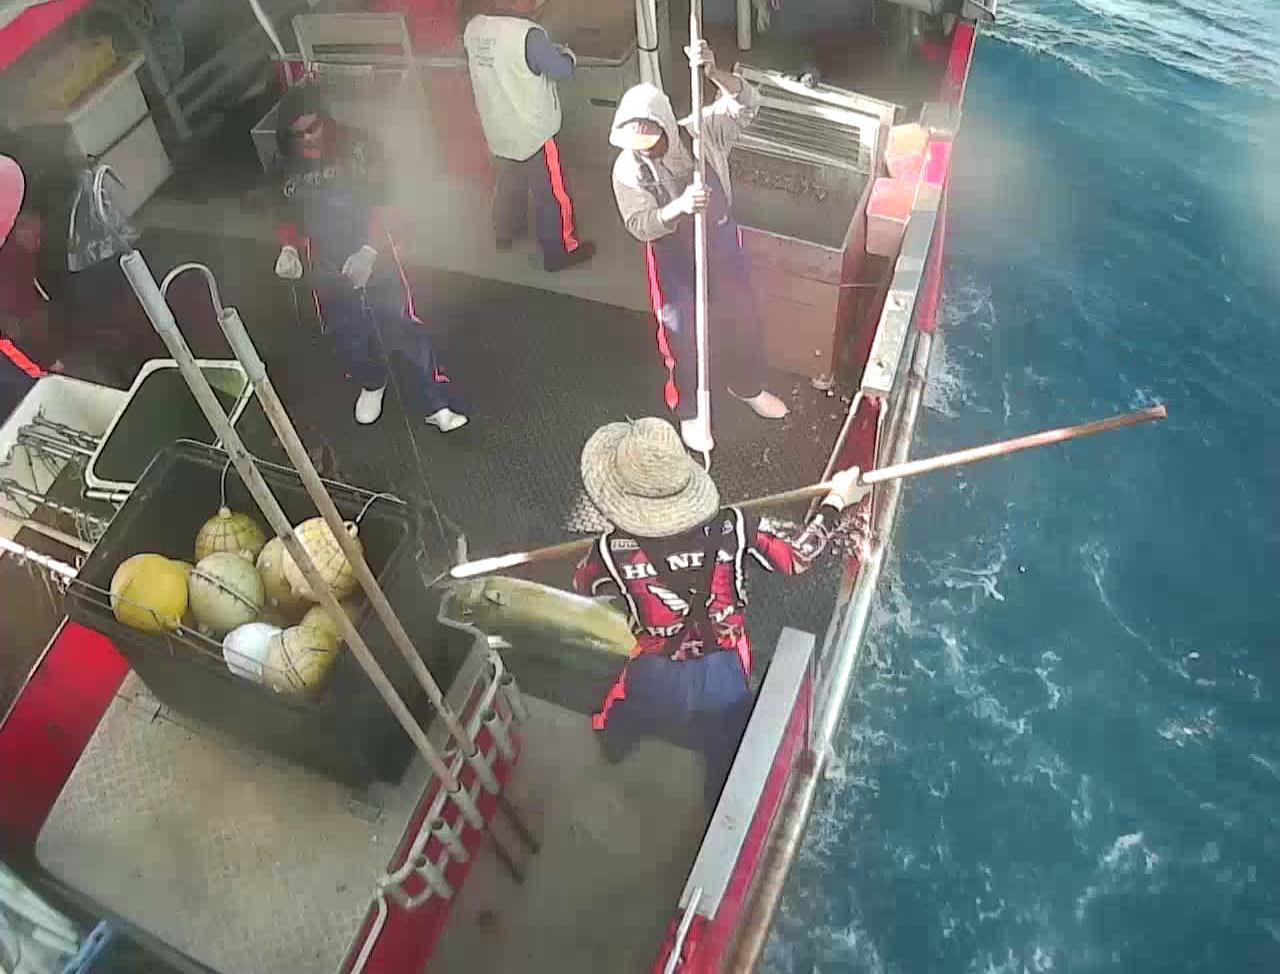

In [5]:
Image(data="data/train/train/DOL/img_00644.jpg")

<u>LAG - Opah, Moonfish</u>

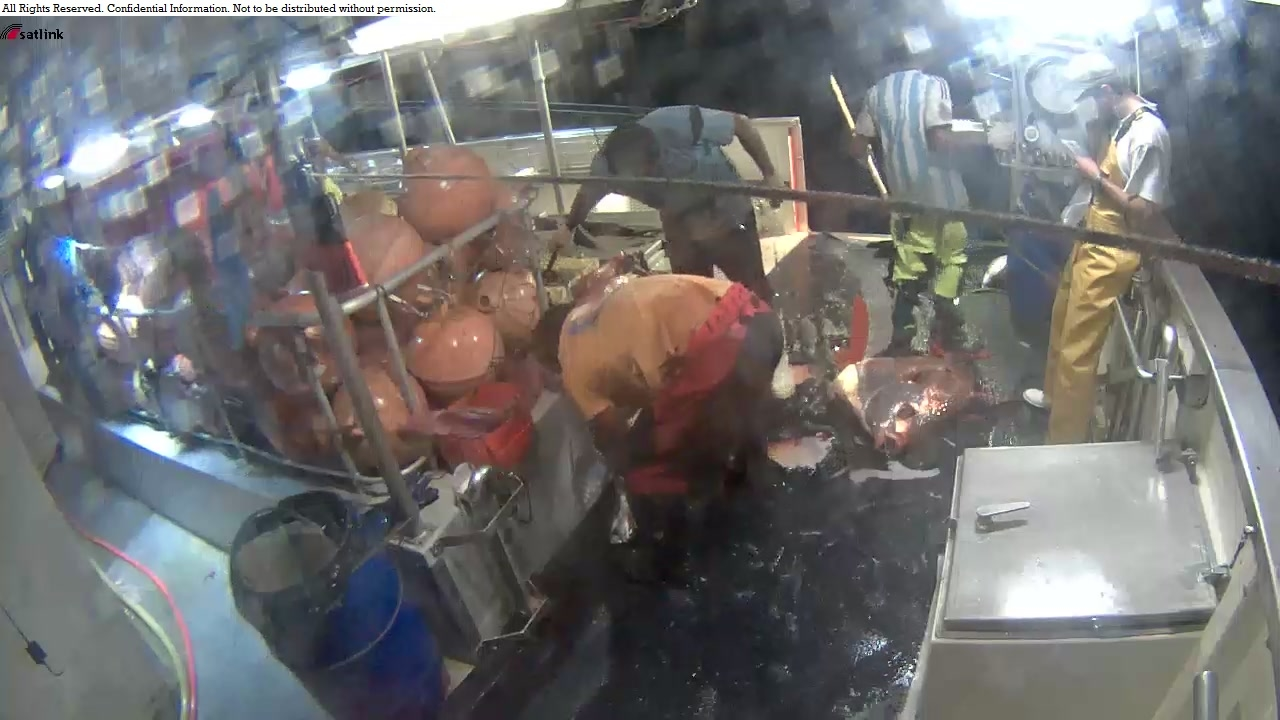

In [6]:
Image(data="data/train/train/LAG/img_02186.jpg")

<u>SHARK - Various: Silky, Shortfin Mako</u>

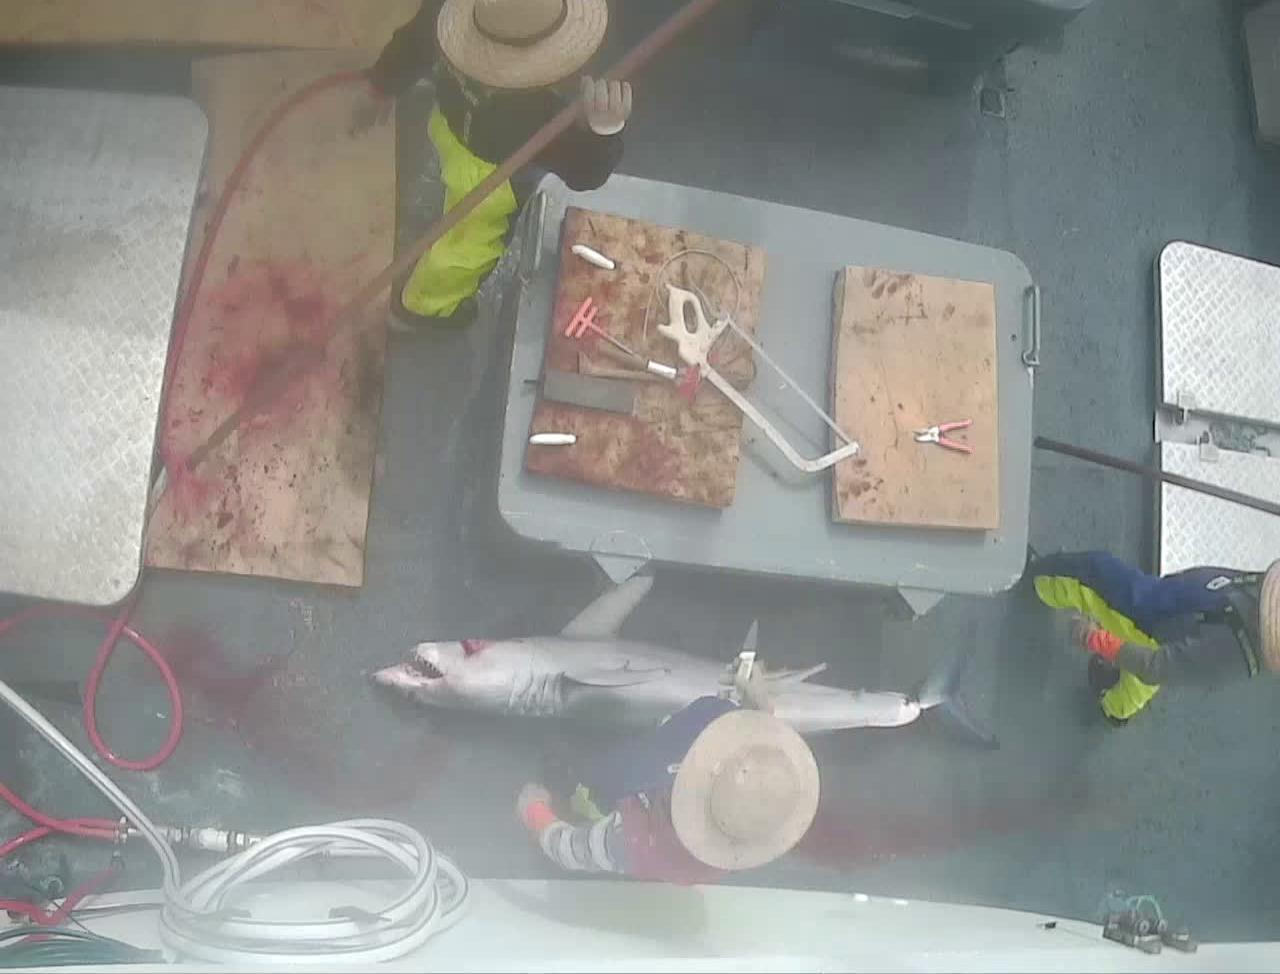

In [7]:
Image(data="data/train/train/SHARK/img_04837.jpg")

<u>YFT - Yellowfin tuna</u>

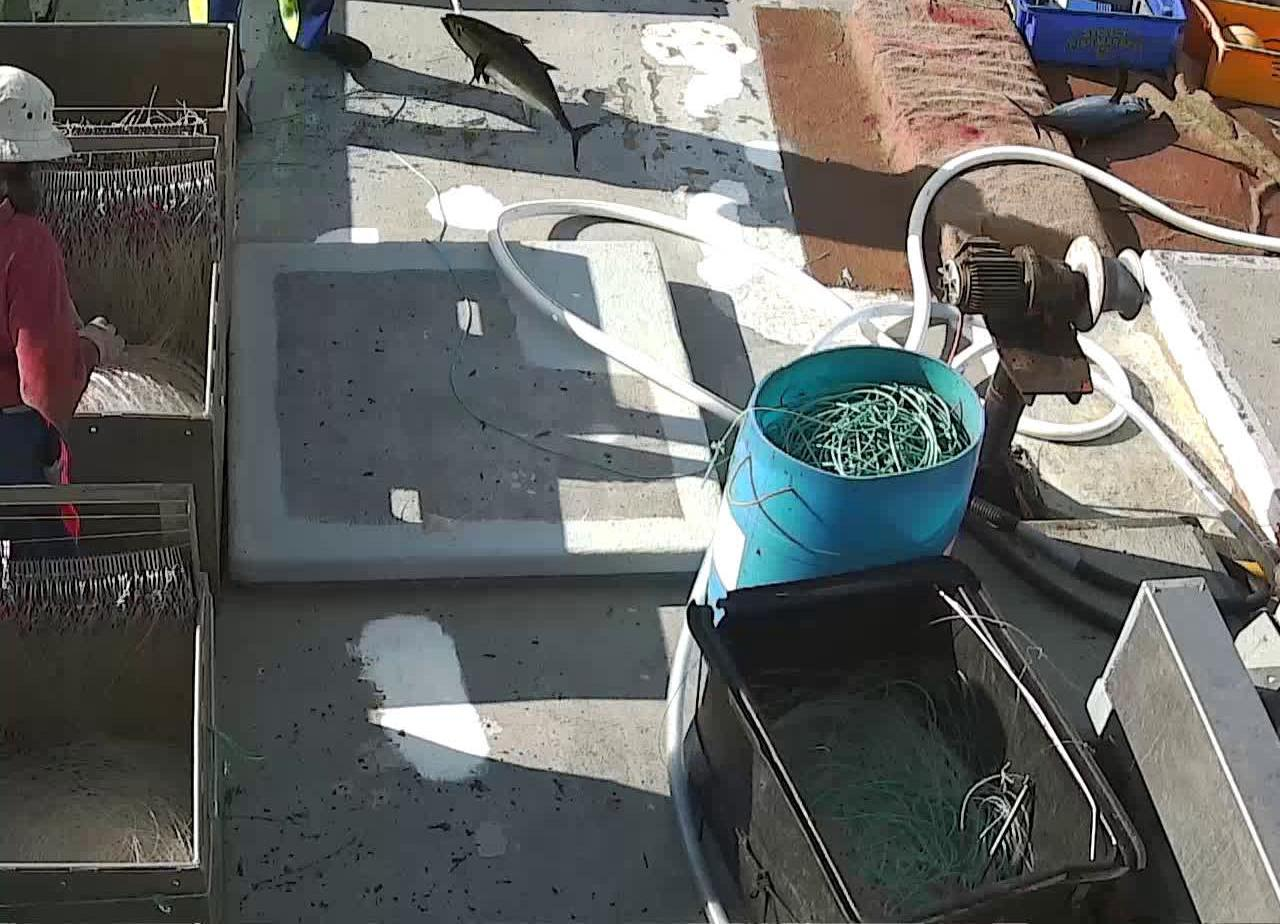

In [8]:
Image(data="data/train/train/YFT/img_00739.jpg")

<u>NoF - No fish</u>

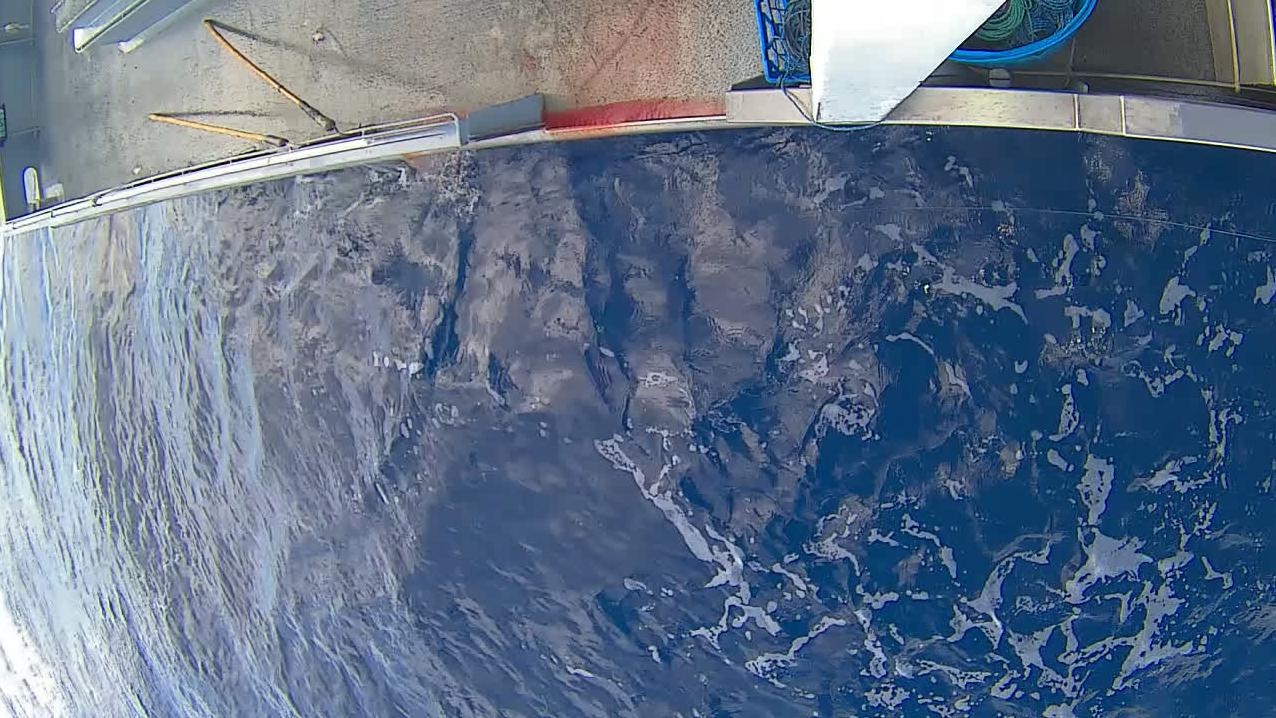

In [9]:
Image(data="data/train/train/NoF/img_03972.jpg")

<u>OTHER - Other fishes</u>

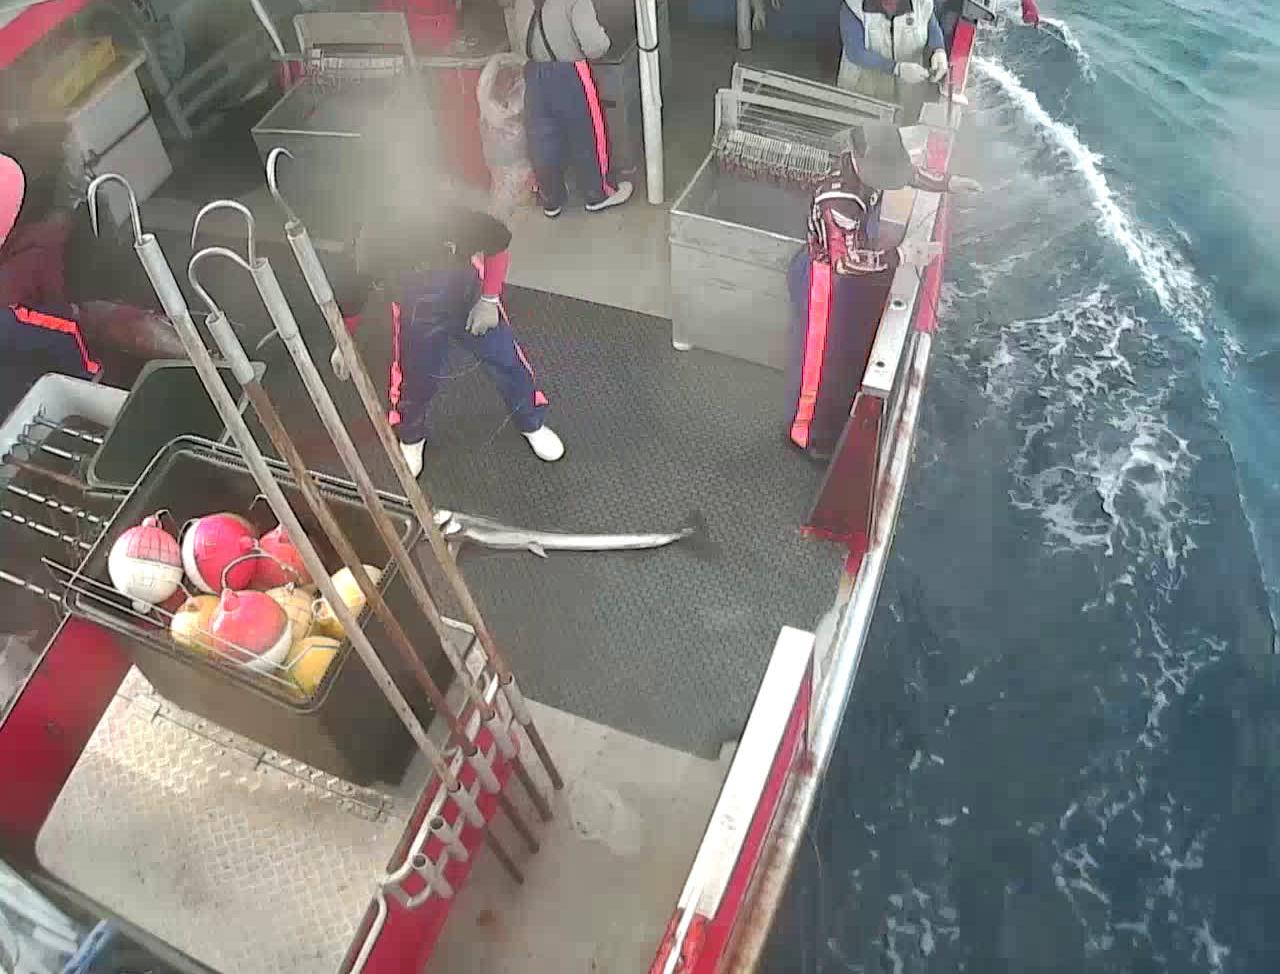

In [10]:
Image(data="data/train/train/OTHER/img_02395.jpg")

If we look at the these images we can see that this data is not prepared for classification. So the task is to first detect where the fish is in the image and than we can classify the fish.

#### Check how many training examples are aviable for each class <br>


In [11]:
def count_files(path, extension=".jpg"):
    count = 0
    for file in os.listdir(path):
        if file.endswith(extension):
            count += 1
    return count

In [12]:
# Returns a pandas Dataframe with two columns, containg folder name and the amount of files for that folder
def files_per_folder(path, extension=".jpg"):
    df = pd.DataFrame(columns=["folder", "count"])
    for file in os.listdir(path):
        child = os.path.join(path, file)
        if os.path.isdir(child):
            count = count_files(child, extension)
            df = df.append({
                "folder": file,
                "count": count
            }, ignore_index=True)
    return df

In [13]:
# amount of examples for each class
classes = files_per_folder("data/train/train/")
classes

,folder,count
0,ALB,1719.0
1,BET,200.0
2,DOL,117.0
3,LAG,67.0
4,NoF,465.0
5,OTHER,299.0
6,SHARK,176.0
7,YFT,734.0


On the table above we can see that the amount of training examples for each class are very unbalanced.<br>
If we compare the class "ALB" with "LAG" we can see that there is a very huge difference in the amount of training examples

#### Check the size of the images

In [41]:
def image_sizes_per_folder(path):
    sizes = []
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            child = os.path.join(path, file)
            img = cv2.imread(child)
            sizes.append(len(img.ravel()))
    return sizes

<u>ALB - Albacore tuna</u>

In [42]:
sizes = image_sizes_per_folder("data/train/train/ALB/")
print(np.mean(sizes), np.std(sizes))

(2791384.1256544502, 232159.46328013047)


<u>BET - Bigeye tuna</u>

In [43]:
sizes = image_sizes_per_folder("data/train/train/BET/")
print(np.mean(sizes), np.std(sizes))

(3190160.5800000001, 520966.96287183475)


<u>DOL - Dolphinfish</u>

In [44]:
sizes = image_sizes_per_folder("data/train/train/DOL/")
print(np.mean(sizes), np.std(sizes))

(3113550.769230769, 445201.31263994658)


<u>LAG - Opah, Moonfish</u>

In [45]:
sizes = image_sizes_per_folder("data/train/train/LAG/")
print(np.mean(sizes), np.std(sizes))

(2764800.0, 0.0)


<u>SHARK - Various: Silky, Shortfin Mako</u>

In [46]:
sizes = image_sizes_per_folder("data/train/train/SHARK/")
print(np.mean(sizes), np.std(sizes))

(3037396.3636363638, 419963.61589747982)


<u>YFT - Yellowfin tuna</u>

In [47]:
sizes = image_sizes_per_folder("data/train/train/YFT/")
print(np.mean(sizes), np.std(sizes))

(3069551.5422343323, 425221.07228603418)


<u>NoF - No fish</u>

In [48]:
sizes = image_sizes_per_folder("data/train/train/NoF/")
print(np.mean(sizes), np.std(sizes))

(2977275.2774193548, 634612.27637928445)


<u>OTHER - Other fishes</u>

In [49]:
sizes = image_sizes_per_folder("data/train/train/OTHER//")
print(np.mean(sizes), np.std(sizes))

(2798011.5050167223, 167260.5996543465)


We can see that the image size is not the same over all images.